## **I. Import Necessary Libraries**

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from helpers.analyze import *
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from scipy import stats
import scipy
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as pyoff
import plotly.graph_objs as go
from datetime import datetime, date
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
%matplotlib inline

## **II. Read Dataset**

#### 1. Read dataset

In [4]:
data = pd.read_csv('data_cleaned/Iowa_Liquor_Sales_Cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice Number         object 
 1   Order Date             object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               int64  
 7   County                 object 
 8   Category               int64  
 9   Category Name          object 
 10  Vendor Number          int64  
 11  Vendor Name            object 
 12  Product Key            int64  
 13  Product Name           object 
 14  Pack                   int64  
 15  Bottle Volume (ml)     float64
 16  State Bottle Cost      float64
 17  State Bottle Retail    float64
 18  Bottles Sold           int64  
 19  Sale (Dollars)         float64
 20  Volume Sold (Liters)   float64
 21  Volume Sold (Gallons)  float64
 22  Store Longitude   

In [5]:
# Change type some features
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Pack'] = data['Pack'].astype('object')
data['Bottle Volume (ml)'] = data['Bottle Volume (ml)'].astype('object')
data['Store Longitude'] = data['Store Longitude'].astype('object')
data['Store Latitude'] = data['Store Latitude'].astype('object')

# Check types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice Number         object        
 1   Order Date             datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               int64         
 7   County                 object        
 8   Category               int64         
 9   Category Name          object        
 10  Vendor Number          int64         
 11  Vendor Name            object        
 12  Product Key            int64         
 13  Product Name           object        
 14  Pack                   object        
 15  Bottle Volume (ml)     object        
 16  State Bottle Cost      float64       
 17  State Bottle Retail    float64       
 18  Bottles Sold          

In [6]:
data.shape

(2616994, 24)

In [7]:
data.head(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude
0,INV-54554500001,2023-01-02,5245,BEST TRIP,"1516, SE 1ST ST",DES MOINES,50315,POLK,1022200,100% AGAVE TEQUILA,260,DIAGEO AMERICAS,89177,CASAMIGOS REPOSADO 750.0 (ml),6,750.0,29.99,44.99,3,134.97,2.25,0.59,-93.61379,41.57608
1,INV-54554700023,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,3200 SOUTHEAST 14TH STREET,DES MOINES,50320,POLK,1022100,MIXTO TEQUILA,395,PROXIMO,89193,JOSE CUERVO ESPECIAL REPOSADO 200.0 (ml),48,200.0,3.63,5.45,48,261.60,9.60,2.53,-93.59738,41.55503
2,INV-54554700003,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,3200 SOUTHEAST 14TH STREET,DES MOINES,50320,POLK,1012200,SCOTCH WHISKIES,260,DIAGEO AMERICAS,4626,BUCHANAN DELUXE 12YR 750.0 (ml),12,750.0,20.99,31.49,12,377.88,9.00,2.37,-93.59738,41.55503


In [8]:
data.tail(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude
2616991,INV-65821000012,2023-12-30,2627,HY-VEE WINE & SPIRITS #1 / MLK,3330 MARTIN LUTHER KING JR PKWY,DES MOINES,50310,POLK,1032000,IMPORTED VODKAS,277,STOLI GROUP,34729,STOLICHNAYA ELIT 750.0 (ml),6,750.0,24.99,37.49,6,224.94,4.5,1.18,-93.65088,41.62615
2616992,INV-65818800038,2023-12-30,5237,WORLD LIQUOR & TOBACCO + VAPE,606 N 15TH ST,FORT DODGE,50501,IOWA,1022200,100% AGAVE TEQUILA,192,"MAST-JAGERMEISTER US, INC",88371,TEREMANA BLANCO TEQUILA 750.0 (ml),6,750.0,15.91,23.87,6,143.22,4.5,1.18,-94.17794,42.51218
2616993,INV-65827100028,2023-12-30,4370,KUM & GO #240 / NORTH AVE NORWALK,530 NORTH AVE,NORWALK,50211,WARREN,1031200,AMERICAN FLAVORED VODKA,205,E & J GALLO WINERY,39492,NEW AMSTERDAM PINK WHITNEY 750.0 (ml),12,750.0,8.00,12.00,2,24.00,1.5,0.39,-93.68186,41.47536


In [9]:
data.columns

Index(['Invoice Number', 'Order Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'County', 'Category', 'Category Name',
       'Vendor Number', 'Vendor Name', 'Product Key', 'Product Name', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',
       'Volume Sold (Gallons)', 'Store Longitude', 'Store Latitude'],
      dtype='object')

#### 2. Create colors

In [10]:
RFM_color = ['#CAECFB', '#68DFC4', '#07B3B2', '#005A74']
sb.color_palette(RFM_color)

[(0.792156862745098, 0.9254901960784314, 0.984313725490196),
 (0.40784313725490196, 0.8745098039215686, 0.7686274509803922),
 (0.027450980392156862, 0.7019607843137254, 0.6980392156862745),
 (0.0, 0.35294117647058826, 0.4549019607843137)]

## **III. Calculate RFM**

#### 1. Recency

In [11]:
# Assign the current date (the date of performing the task) to be February 18, 2024.
now = date(2024,1,1)

# Group by Customers and check last date of purchase
recency = data.groupby( by = 'Store Number')['Order Date'].max().reset_index()

# Change the data type of 'Order Date' and then rename the column.
recency['Order Date'] = pd.DatetimeIndex(recency['Order Date']).date
recency = recency.rename(columns = {'Order Date' : 'Last Purchase Date'})

# Calculate recency
recency['Recency'] = recency['Last Purchase Date'].apply(lambda x: (now - x).days)
recency.drop('Last Purchase Date', axis = 1, inplace = True)

# Print dataframe
recency

,Store Number,Recency
0,2106,3
1,2130,3
2,2190,3
3,2191,4
4,2200,6
...,...,...
2082,10313,10
2083,10314,19
2084,10315,6
2085,10316,2


#### 2. Frequency

In [12]:
# Group Customers by Invoice
frequency = data.groupby(by = 'Store Number')['Invoice Number'].count().reset_index()
frequency = frequency.rename(columns = {'Invoice Number' : 'Frequency'})
frequency

,Store Number,Frequency
0,2106,3261
1,2130,3211
2,2190,32002
3,2191,6779
4,2200,3516
...,...,...
2082,10313,27
2083,10314,110
2084,10315,53
2085,10316,26


#### 3. Monetary

In [13]:
# Group Customers by Revenue
monetary = data.groupby('Store Number')['Sale (Dollars)'].sum().reset_index()
monetary = monetary.rename(columns = {'Sale (Dollars)' : 'Monetary'})
monetary

,Store Number,Monetary
0,2106,861093.54
1,2130,1617666.03
2,2190,15980052.64
3,2191,1505725.59
4,2200,321115.87
...,...,...
2082,10313,9711.08
2083,10314,12674.25
2084,10315,9825.10
2085,10316,3085.87


#### 4. Create RFM Table

In [14]:
rfm = recency.merge(frequency, on = 'Store Number')
rfm = rfm.merge(monetary, on = 'Store Number')
rfm

,Store Number,Recency,Frequency,Monetary
0,2106,3,3261,861093.54
1,2130,3,3211,1617666.03
2,2190,3,32002,15980052.64
3,2191,4,6779,1505725.59
4,2200,6,3516,321115.87
...,...,...,...,...
2082,10313,10,27,9711.08
2083,10314,19,110,12674.25
2084,10315,6,53,9825.10
2085,10316,2,26,3085.87


## **IV. RFM Data Preparation**

#### 1. Summary About RFM

Feature: Recency


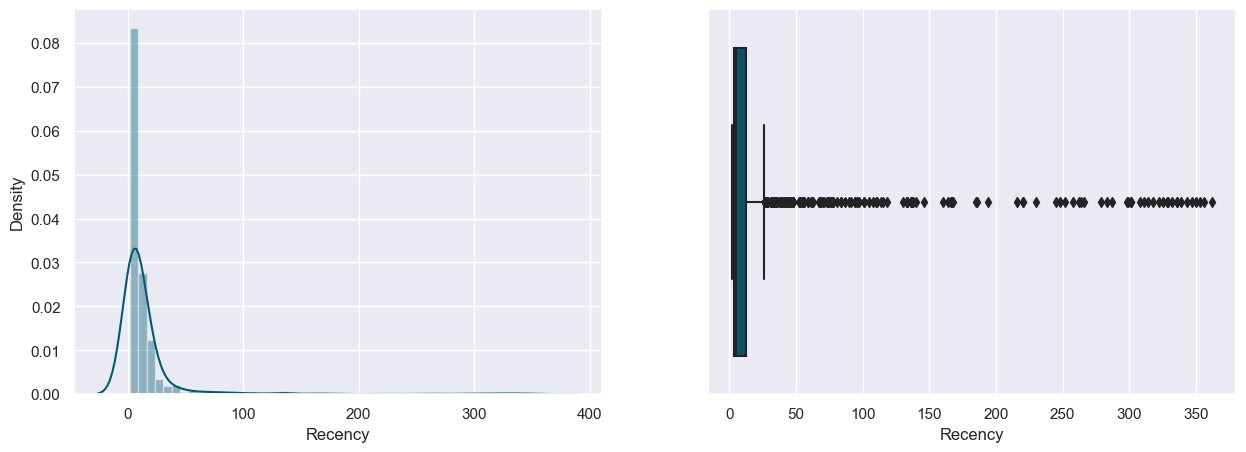

Describe:
count    2087.000000
mean       17.305223
std        42.854626
min         2.000000
25%         4.000000
50%         5.000000
75%        13.000000
max       362.000000
Name: Recency, dtype: float64
Mode: 0    5
Name: Recency, dtype: int64
Range: 360
IQR: 9.0
Var: 1836.5189707916559
Skew: 5.6372084687066
Kurtosis: 34.55885086199966
Number of upper outliers: 210
Number of lower outliers: 0
Percentage of outliers: 10.0 %


************************************************************ 

Feature: Frequency


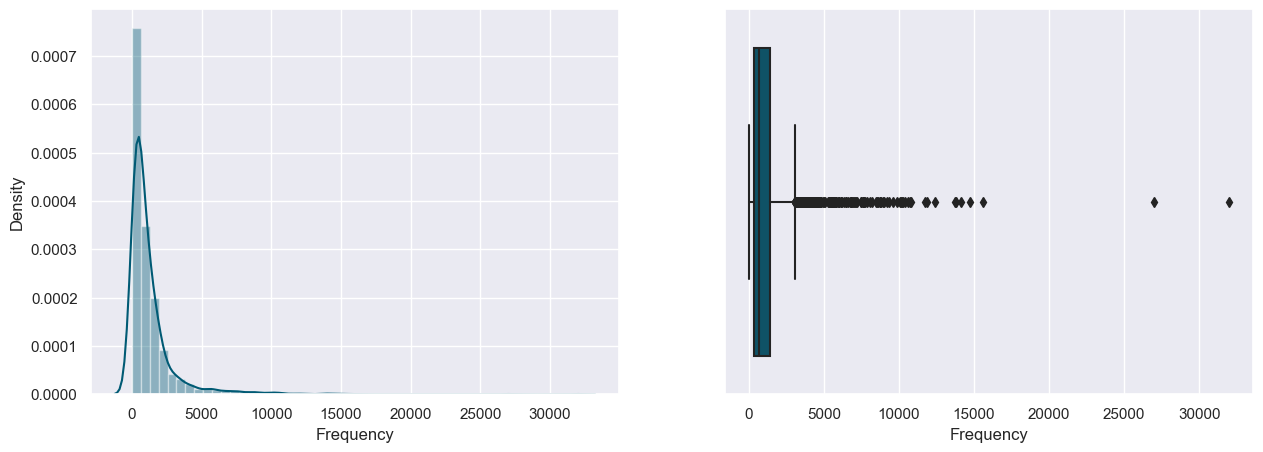

Describe:
count     2087.000000
mean      1253.950168
std       1890.967190
min          1.000000
25%        338.500000
50%        669.000000
75%       1425.000000
max      32002.000000
Name: Frequency, dtype: float64
Mode: 0    340
Name: Frequency, dtype: int64
Range: 32001
IQR: 1086.5
Var: 3575756.915061094
Skew: 5.806534948449507
Kurtosis: 59.89615097900715
Number of upper outliers: 176
Number of lower outliers: 0
Percentage of outliers: 8.0 %


************************************************************ 

Feature: Monetary


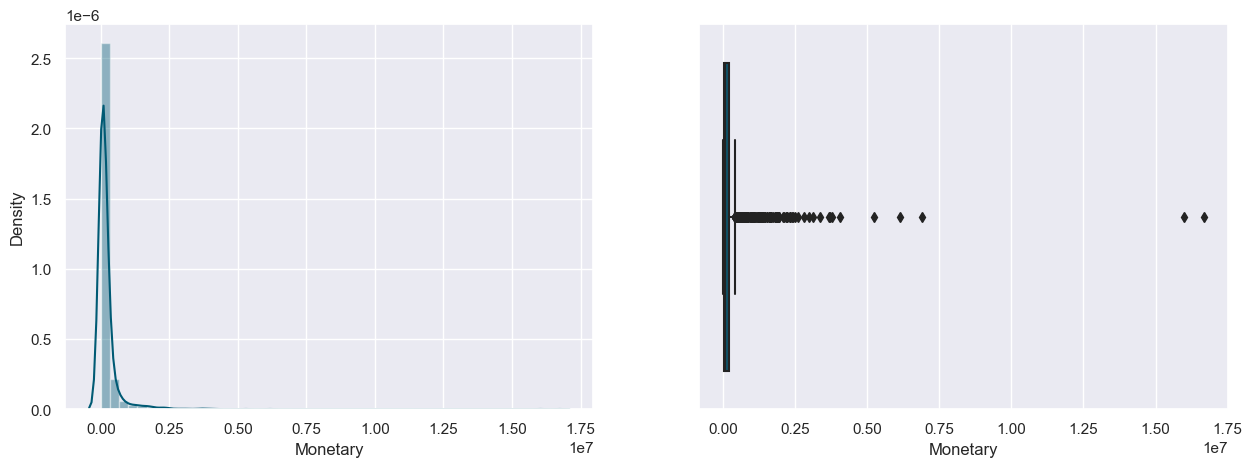

Describe:
count    2.087000e+03
mean     2.131276e+05
std      6.592788e+05
min      1.575000e+01
25%      3.980797e+04
50%      7.267182e+04
75%      1.850383e+05
max      1.666695e+07
Name: Monetary, dtype: float64
Mode: 0    2299.29
Name: Monetary, dtype: float64
Range: 16666935.76
IQR: 145230.37
Var: 434648587923.2959
Skew: 15.927777277368419
Kurtosis: 353.9738578164156
Number of upper outliers: 206
Number of lower outliers: 0
Percentage of outliers: 10.0 %


************************************************************ 



In [15]:
for col in rfm.columns[1:]:
    print('Feature:', col)
    univariate_visualization_analysis_continuous_variable(rfm, rfm[col])
    univariate_analysis_continuous_variable(rfm, rfm[col])
    n_O_upper, n_L_upper, outliers_per = check_outlier(rfm, rfm[col])
    print('\n')
    print('*' * 60 ,'\n')

`Comment:`  
- We have some problems:
    - `Recency` distribution is right-skewed.
    - `Frequency` distribution is right-skewed.
    - `Monetary` distribution is left-skewed and leptokurtic.  
    -  There are relatively many outliers in all three variables above.  

  => All three fields do not follow a normal distribution of data. It is necesssary to transformation data before using K-mean.  



- Some method for transformation 
    - `log` transformation.
    - `square root` transformation.
    - `box-cox` transformation.
    - `cube root` tranformation.

#### 2. Feature Engineering

In [16]:
def analyze_skewness(x):
    fig, ax = plt.subplots(1,5, figsize=(10,5))
    sb.distplot(rfm[x], ax=ax[0], color= "#005A74")
    sb.distplot(np.log(rfm[x]), ax=ax[1], color= "#005A74")
    sb.distplot(np.sqrt(rfm[x]), ax=ax[2], color= "#005A74")
    sb.distplot(stats.boxcox(rfm[x])[0], ax=ax[3], color= "#005A74")
    sb.distplot(np.cbrt(rfm[x]), ax=ax[4], color= "#005A74") 
    plt.tight_layout()
    plt.show()
    #Print result 
    print("Original Skewness:", rfm[x].skew().round(2))
    print("Log-transformed Skewness:", np.log(rfm[x]).skew().round(2))
    print("Square Root-transformed Skewness:", np.sqrt(rfm[x]).skew().round(2))
    print("Box-Cox transformed Skewness:", pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))
    print("Cube Root-transformed Skewness:", pd.Series(np.cbrt(rfm[x])).skew().round(2))


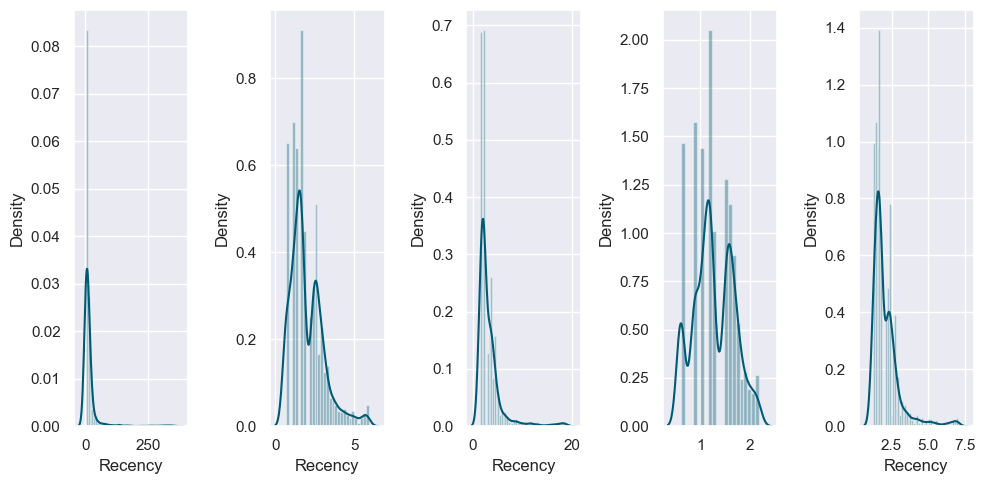

Original Skewness: 5.64
Log-transformed Skewness: 1.19
Square Root-transformed Skewness: 3.49
Box-Cox transformed Skewness: 0.12
Cube Root-transformed Skewness: 2.64


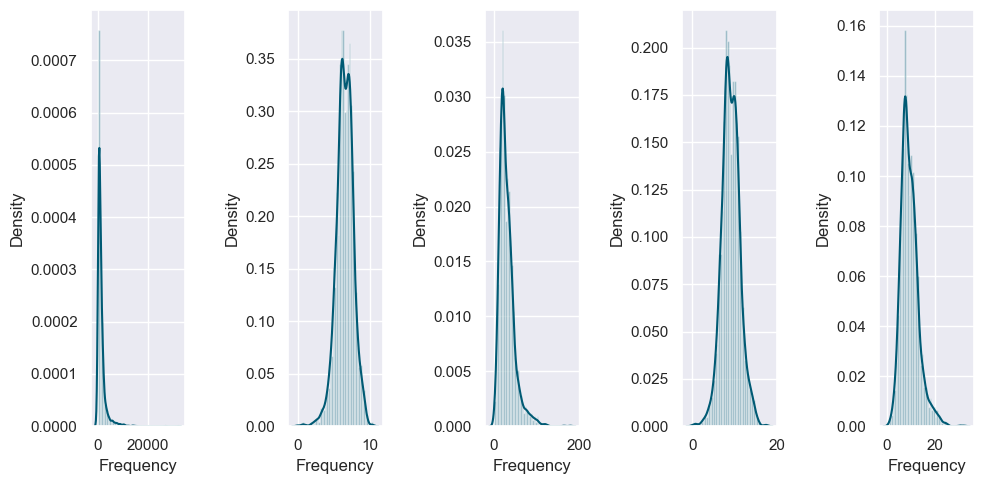

Original Skewness: 5.81
Log-transformed Skewness: -0.47
Square Root-transformed Skewness: 1.91
Box-Cox transformed Skewness: 0.03
Cube Root-transformed Skewness: 1.11


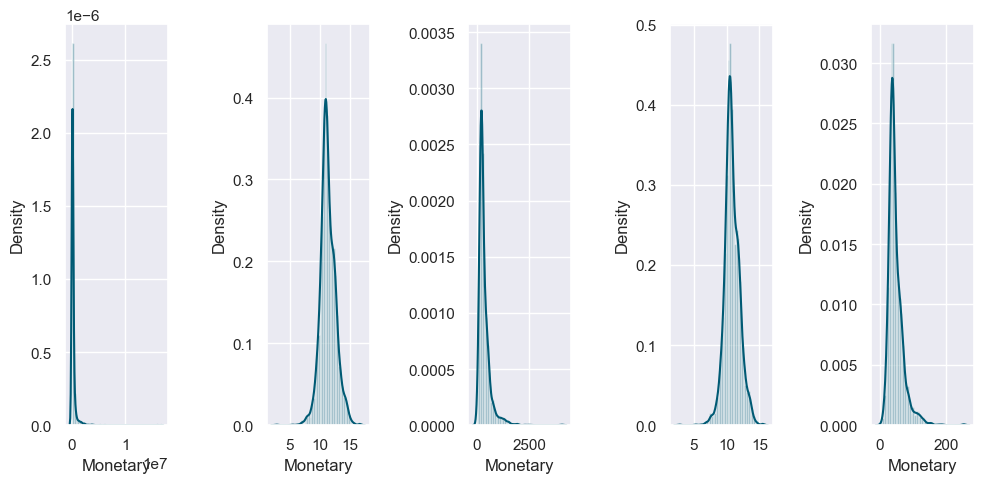

Original Skewness: 15.93
Log-transformed Skewness: 0.06
Square Root-transformed Skewness: 4.07
Box-Cox transformed Skewness: -0.01
Cube Root-transformed Skewness: 2.29


In [17]:
for col in rfm.columns[1:]:
    analyze_skewness(col)

`Comment:`  
All data fields are well-suited for Box-Cox transformation as the Box-Cox values are closest to zero.

#### 3. Create a new RFM dataframe with boxcox

In [18]:
rfm_bc = pd.DataFrame()
# Tranform Recency to box-cox transformation
rfm_bc['Recency'] = stats.boxcox(rfm['Recency'])[0]

# Tranform Frequency to box-cox transformation
rfm_bc['Frequency'] = stats.boxcox(rfm['Frequency'])[0]

# Tranform Monetary to box-cox transformation
rfm_bc['Monetary'] = stats.boxcox(rfm['Monetary'])[0]

# Check new dataframe
rfm_bc

,Recency,Frequency,Monetary
0,0.881613,12.142587,12.923049
1,0.881613,12.109445,13.484832
2,0.881613,17.613385,15.501016
3,1.053191,13.768938,13.421089
4,1.262639,12.304774,12.038315
...,...,...,...
2082,1.480831,3.866269,8.841620
2083,1.696724,5.916651,9.088210
2084,1.262639,4.816886,8.852440
2085,0.602075,3.814843,7.773844


#### 4. Scaler Data with Standard Scaler

In [19]:
# Using StandardScaler
scaler = SklearnTransformerWrapper(transformer = StandardScaler())
scaler.fit(rfm_bc)
rfm_scaler = scaler.transform(rfm_bc)
rfm_scaler

,Recency,Frequency,Monetary
0,-0.961115,1.420018,1.825049
1,-0.961115,1.404591,2.309916
2,-0.961115,3.966642,4.050057
3,-0.538735,2.177075,2.254901
4,-0.023128,1.495515,1.061448
...,...,...,...
2082,0.514003,-2.432558,-1.697576
2083,1.045474,-1.478118,-1.484748
2084,-0.023128,-1.990052,-1.688237
2085,-1.649262,-2.456497,-2.619158


`Summary RFM data when using Standard Scaler`

Feature: Recency


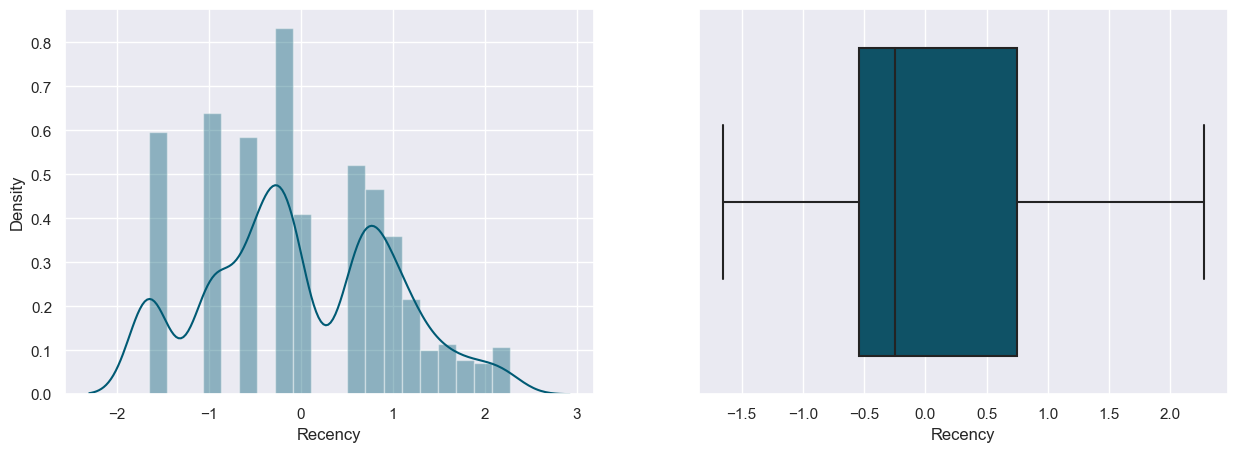

Describe:
count    2.087000e+03
mean     6.809226e-17
std      1.000240e+00
min     -1.649262e+00
25%     -5.387348e-01
50%     -2.442403e-01
75%      7.485279e-01
max      2.271578e+00
Name: Recency, dtype: float64
Mode: 0   -0.24424
Name: Recency, dtype: float64
Range: 3.920839953751803
IQR: 1.2872626657542023
Var: 1.0004793863854269
Skew: 0.11573497273049069
Kurtosis: -0.7281343786489543
Number of upper outliers: 0
Number of lower outliers: 0
Percentage of outliers: 0.0 %


************************************************************ 

Feature: Frequency


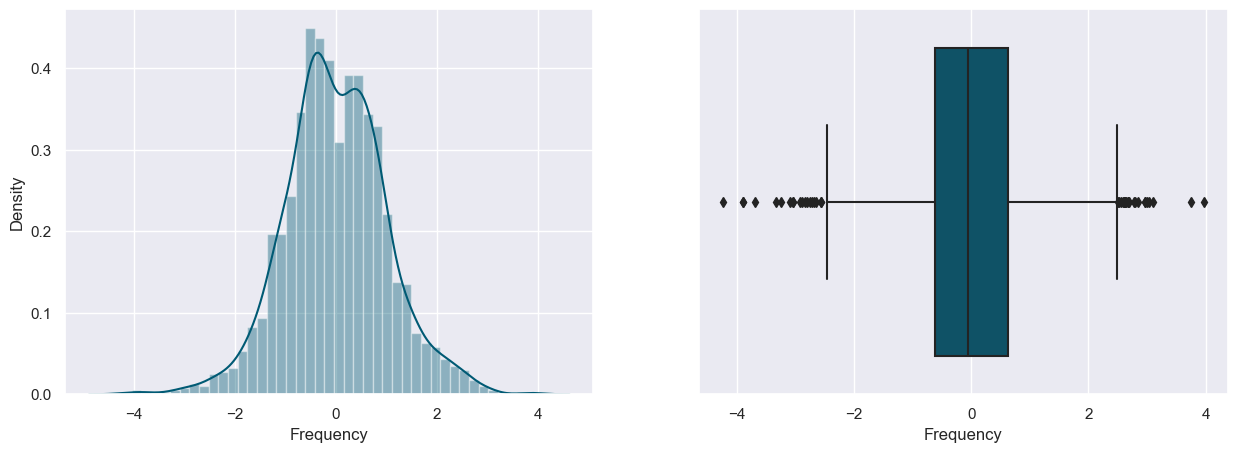

Describe:
count    2.087000e+03
mean    -5.447381e-17
std      1.000240e+00
min     -4.232283e+00
25%     -6.177239e-01
50%     -5.003082e-02
75%      6.243309e-01
max      3.966642e+00
Name: Frequency, dtype: float64
Mode: 0   -0.614155
Name: Frequency, dtype: float64
Range: 8.198924820670284
IQR: 1.2420547873604173
Var: 1.0004793863854267
Skew: 0.02942008568071504
Kurtosis: 0.7412036491796687
Number of upper outliers: 22
Number of lower outliers: 19
Percentage of outliers: 2.0 %


************************************************************ 

Feature: Monetary


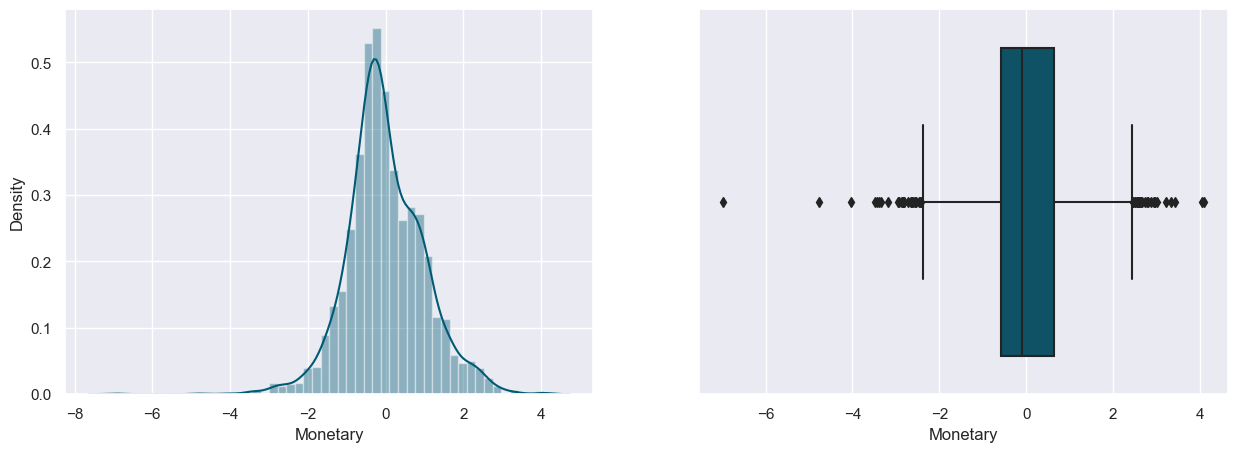

Describe:
count    2.087000e+03
mean    -1.143950e-15
std      1.000240e+00
min     -6.976145e+00
25%     -5.753879e-01
50%     -1.005954e-01
75%      6.320006e-01
max      4.081726e+00
Name: Monetary, dtype: float64
Mode: 0   -2.857093
Name: Monetary, dtype: float64
Range: 11.057870651384441
IQR: 1.2073885405175395
Var: 1.0004793863854269
Skew: -0.007046122429263975
Kurtosis: 2.058078500517939
Number of upper outliers: 27
Number of lower outliers: 27
Percentage of outliers: 3.0 %


************************************************************ 



In [20]:
for col in rfm.columns[1:]:
    print('Feature:', col)
    univariate_visualization_analysis_continuous_variable(rfm_scaler, rfm_scaler[col])
    univariate_analysis_continuous_variable(rfm_scaler, rfm_scaler[col])
    n_O_upper, n_L_upper, outliers_per = check_outlier(rfm_scaler, rfm_scaler[col])
    print('\n')
    print('*' * 60 ,'\n')

`Comment:`  
- After applying the `Standard Scaler`, the distributions of the three variables appear to be close to normal distributions.    
- Additionally, the proportion of outliers in the variables has significantly decreased.

=> Hence, it is possible to proceed with using an algorithm to segment customers.

## **V. Customer Segmentation with Machine Learning**

#### 1. Using K-Means with Elbow Method

In [21]:
# Loop from 2 to 10 clusters and monitor the WSSE (within cluster sum of squares)
wsse_list = []
K_range = range(2, 11)

for k in K_range:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    model.fit(rfm_scaler)

    # Append the inertia to the list of inertias
    wsse_list.append(model.inertia_)

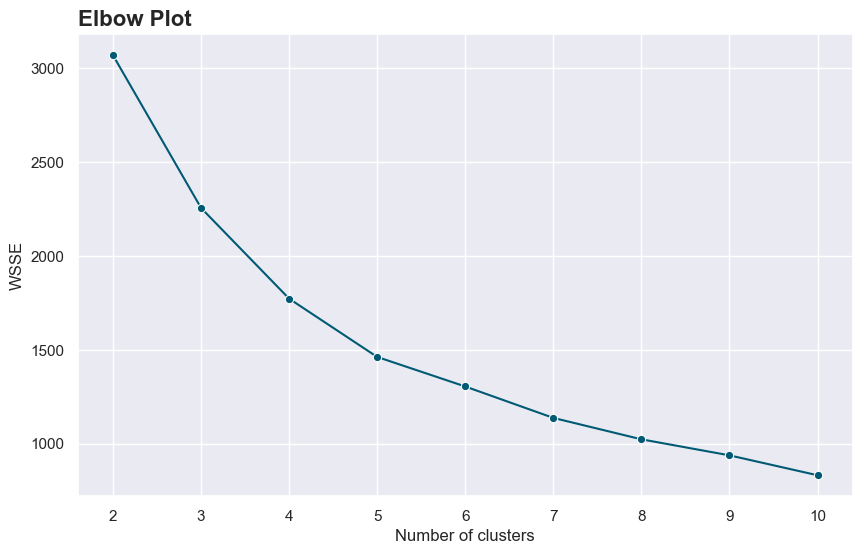

In [22]:
# Visualize the elbow plot
plt.figure(figsize=(10, 6))
sb.lineplot(x=K_range, y=wsse_list, marker='o', color= "#005A74")
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.title('Elbow Plot',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.show();

`Comment:`  
The elbow method might not be very helpful in this situation, but looking at the overall picture, we can make a preliminary choice with 3 to 5 clusters for the problem.  
Let's try with Hierarchical Clustering to have a better insight.




#### 2. Using Hierarchical Clustering with Dendrogram

In [23]:
# Calculate the linkage
linkage_matrix = linkage(rfm_scaler, method = 'ward', metric= 'euclidean')

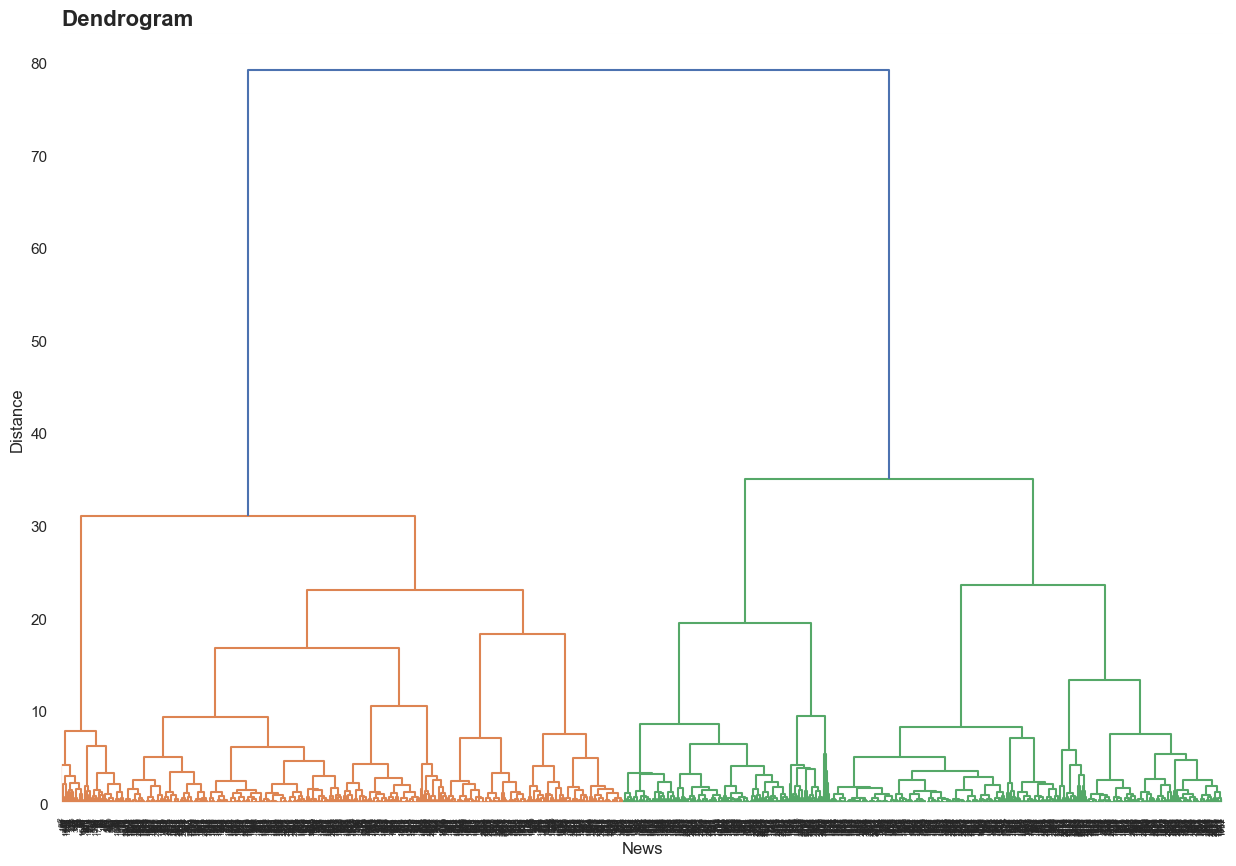

In [24]:
# Plot the dendrogram
plt.figure(figsize = (15, 10))
dendrogram(linkage_matrix, leaf_rotation= 90, leaf_font_size= 6)
plt.title('Dendrogram',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.xlabel('News')
plt.ylabel('Distance')
plt.show();

`Comment:`  
The dendrogram provides a clearer view of how the data is clustered and somewhat reinforces the choice between 3 or 4 clusters from the previous method.  
Let's try another approach by using Silhouette Scores.

#### 3. Using K-Means with Silhouette Method

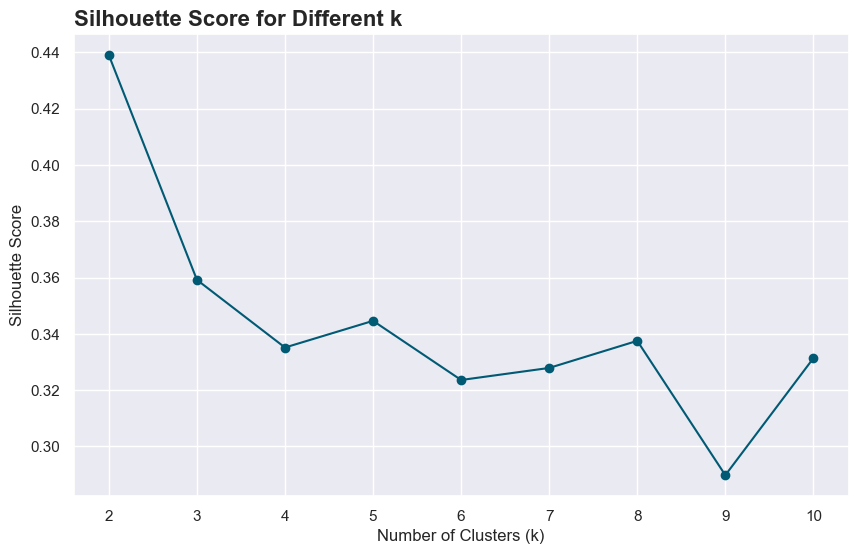

Best k value based on Silhouette Score: 2


In [25]:
silhouette_scores = []
possible_k_values = range(2, 11)  # k from 2 to 10
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaler)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm_scaler, labels))

# Visualize Silhouette Score for each k value
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o', color= "#005A74")
plt.title('Silhouette Score for Different k',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# Choose the best k
best_k = possible_k_values[np.argmax(silhouette_scores)]
print(f"Best k value based on Silhouette Score: {best_k}")

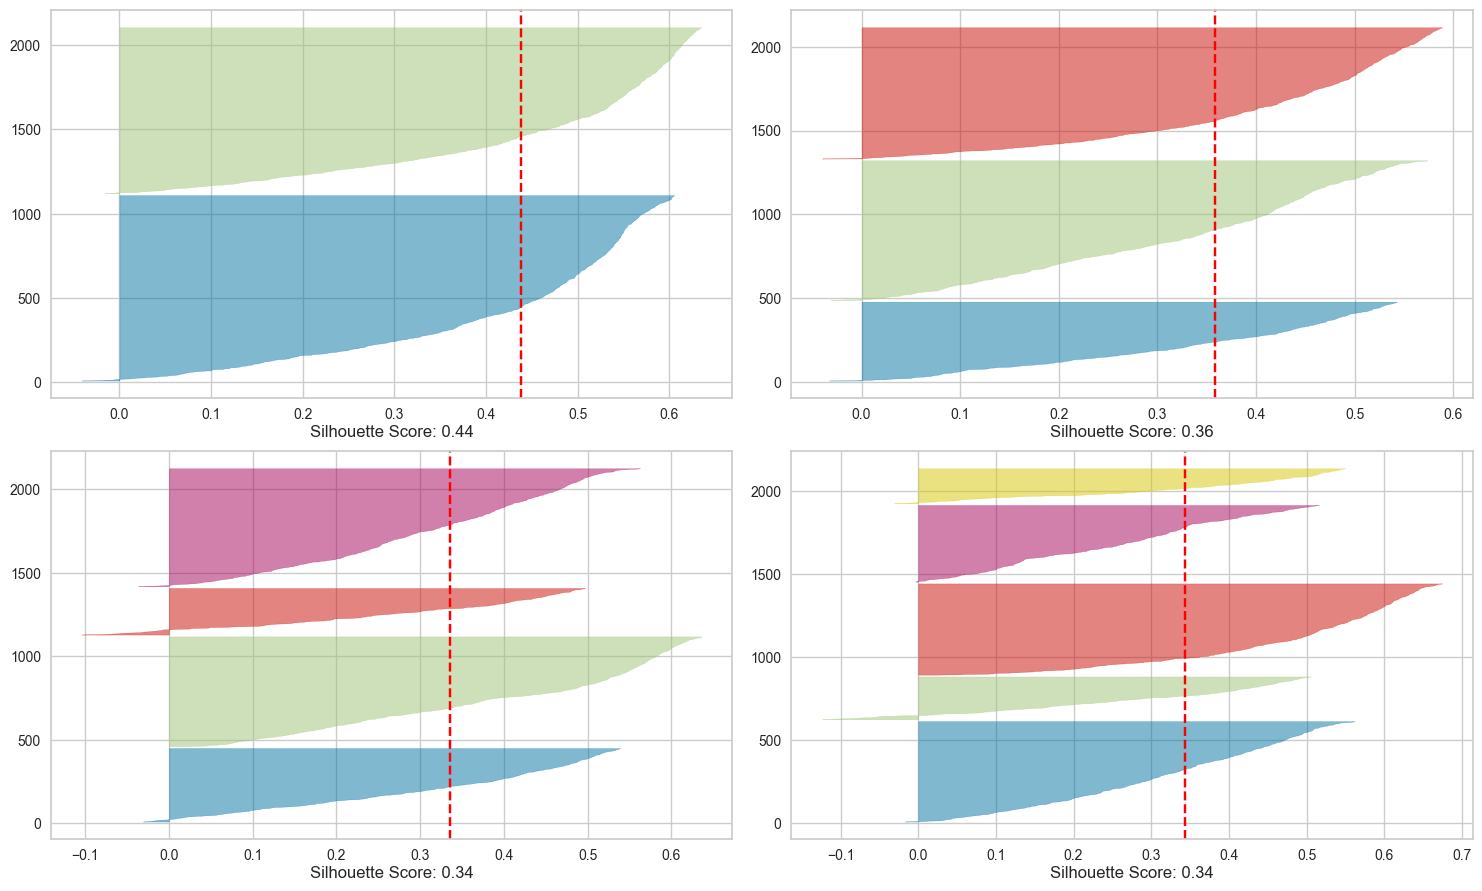

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer
# Visualize
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
for idx, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(idx, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(rfm_scaler)
    ax[q][mod].text(0.5, -0.1, f'Silhouette Score: {np.mean(visualizer.silhouette_score_):.2f}', size=12, ha='center', transform=ax[q][mod].transAxes)
plt.tight_layout()
plt.show()

`Conclusion:`   
- In all three methods, we will not choose k = 2. Although the Silhouette Score indicates that k = 2 has the highest score, when looking at the Silhouette Chart at k = 2, the density of data within each cluster is relatively high. While the score and the consistency between clusters are reasonable, we need more than 2 customer groups in this problem to identify more detailed characteristics of each group, facilitating effective planning for the upcoming year.
- For the Hierarchical Clustering method, we can more clearly determine the number of clusters, which are 3 and 4.
- Finally, to make a decision based on the two points above after eliminating k = 2 and narrowing down the clusters to 3 and 4, we observe that the Silhouette Score at k = 3 is higher than the other clusters. However, after going through some detailed testing processes such as the number of customers in each cluster, the characteristics of the centroids of each cluster, k = 4 provides the optimal result among the mentioned clusters.

Therefore, by combining the three clustering methods as above, I choose k = 4.

#### 4. Choose k = 4 and fit it with scaler data (using K-Means)

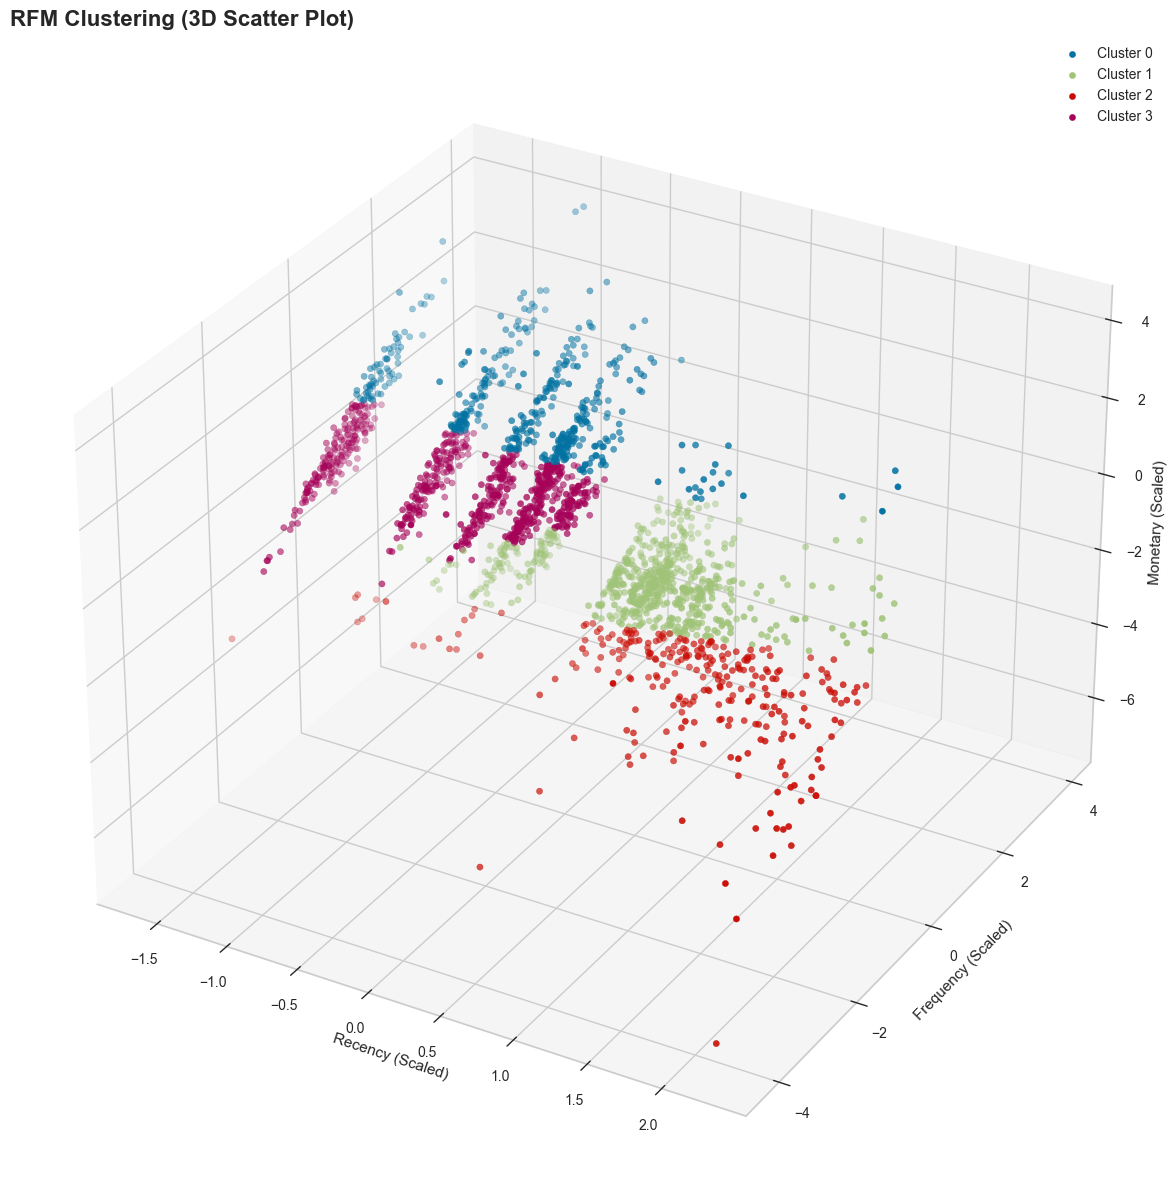

In [27]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, random_state=42)
kmeans = kmeans.fit(rfm_scaler)
clusters = kmeans.predict(rfm_scaler)
rfm_scaler['Cluster'] = clusters

# Visualize with 3D graph by Recency, Frequency and Monetary
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    cluster_data = rfm_scaler[rfm_scaler['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i}')

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')
ax.set_title('RFM Clustering (3D Scatter Plot)',loc = 'left',  fontweight = 'heavy', fontsize = 16)
ax.legend()
plt.show()


`Comment:`  
- The four clusters are relatively well-separated.    
- The data mixing ratio between clusters is quite low.  

In [28]:
rfm_scaler

,Recency,Frequency,Monetary,Cluster
0,-0.961115,1.420018,1.825049,0
1,-0.961115,1.404591,2.309916,0
2,-0.961115,3.966642,4.050057,0
3,-0.538735,2.177075,2.254901,0
4,-0.023128,1.495515,1.061448,0
...,...,...,...,...
2082,0.514003,-2.432558,-1.697576,2
2083,1.045474,-1.478118,-1.484748,2
2084,-0.023128,-1.990052,-1.688237,2
2085,-1.649262,-2.456497,-2.619158,2


In [29]:
# Check Cluster Centers
kmeans.cluster_centers_

array([[-0.62331526,  1.31814583,  1.37804662],
       [ 0.70004983, -0.40417793, -0.38057428],
       [ 1.29544358, -1.52794598, -1.48055225],
       [-0.77676806,  0.15965463,  0.08151983]])

In [30]:
# Create Cluster featue for rfm data
rfm['Cluster'] = clusters
rfm.sample(20)

,Store Number,Recency,Frequency,Monetary,Cluster
1357,5745,5,525,78918.68,3
1261,5616,5,315,33913.49,1
1909,10072,5,695,88114.12,3
1532,5956,3,1506,224297.51,3
1204,5546,14,501,42837.15,1
524,4404,4,724,49788.07,3
799,4843,14,310,17493.31,1
1534,5959,10,48,10507.99,2
1412,5802,25,526,46854.30,1
849,4942,2,577,82995.70,3


In [31]:
# Calculate mean score clusters for each feature
rfm_clusters = rfm.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(0)

rfm_clusters

,Recency,Frequency,Monetary
Cluster,,,
0,5.0,3573.0,740984.0
1,18.0,502.0,58150.0
2,69.0,128.0,16496.0
3,4.0,954.0,106200.0


In [32]:
rfm_clusters.reset_index(inplace = True)

`Visualize with 3D graph by Recency, Frequency and Monetary for main data (rfm dataframe)`

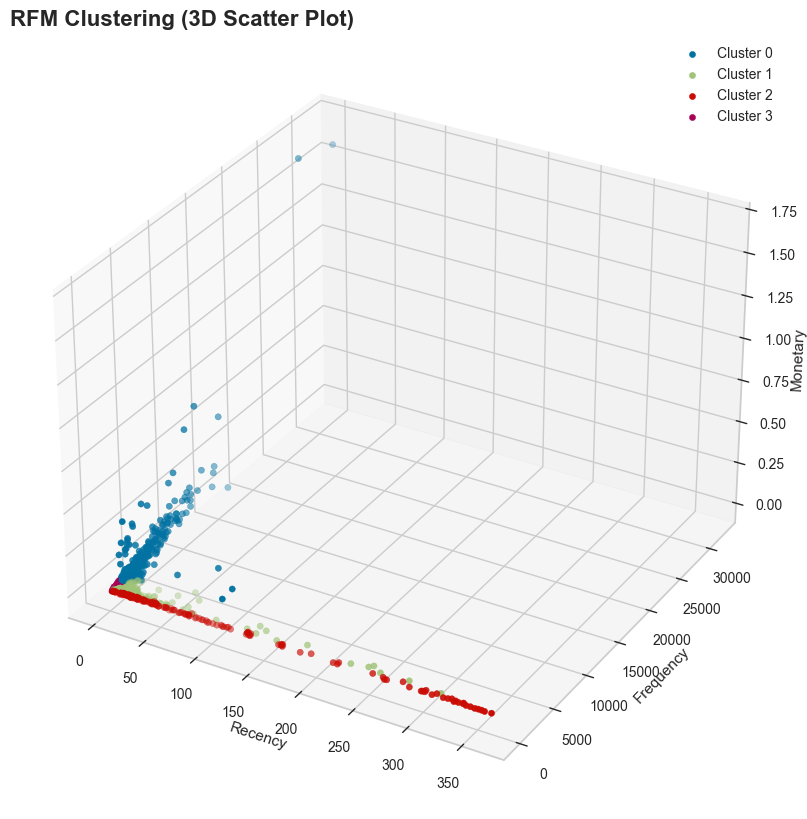

In [33]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')
k = 4

for i in range(k):
    cluster_data = rfm[rfm['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Clustering (3D Scatter Plot)',loc = 'left',  fontweight = 'heavy', fontsize = 16)
ax.legend()
plt.show()


### 5. Summary About RFM After Clustering Customer

`How many customers for each clusters?`

In [34]:
# Create number for each cluster dataframe
cluster_df = rfm['Cluster'].value_counts().to_frame().reset_index()
cluster_df.columns = ['Cluster', 'Number']
cluster_df

,Cluster,Number
0,3,707
1,1,659
2,0,441
3,2,280


In [35]:
fig = px.scatter(rfm_clusters, x = "Recency", y = "Monetary", size = "Frequency", color = "Cluster", hover_name = "Cluster", size_max = 100)  
fig.update_layout(height=500, width=1500)
fig.update_layout(
    title="Details for each Clusters with Mean RFM values",
    height=500,
    width=1500
)
fig.show()

Comment:  


Analysis of Customer Cluster Homogeneity and Differentiation:  

1. Customer Count:
   
    `Homogeneity:`    
    - The number of customers in each cluster is relatively even, with no significant differences. This indicates that the clustering process is effective and the clusters are of similar size.
  
    `Benefits:`    
    - Facilitates easier comparison and analysis of clusters.  
    - Ensures the representativeness of each cluster in the analysis.  

2. Distinctive Characteristics:
   
    `Differentiation:`
    - The clusters are distinct from each other with their own unique characteristics. This indicates that the clustering process is effective and the clusters have clear differences in characteristics.
      
    `Benefits:`  
    - Helps to clearly identify different customer groups.   
    - Supports the development of appropriate marketing strategies for each customer group.


3. No Data Overlap:

    `Separation:`
    - There is no overlap of data between the clusters. This indicates that the clustering process is accurate and customers are clearly classified into each cluster.
   
    `Benefits:`    
    - Ensures the accuracy of the analysis.  
    - Avoids misclassification of customers into inappropriate clusters.

Conclusion:  
- The analysis shows that the customer clustering process wiht K-Means model is effective and the clusters have homogeneity in terms of customer count, differentiation in terms of characteristics, and no data overlap. This makes it easier and more effective to compare, analyze and develop marketing strategies for each customer group.  

`View Customers Group Data Distribution`

In [36]:
# Create function to show histogram chart for each feature in RFM dataframe
def plot_cluster_histplots(dataframe):
    features = ['Recency', 'Frequency', 'Monetary']
    clusters = sorted(dataframe['Cluster'].unique())
    num_rows = len(features)
    num_cols = len(clusters)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

    for i, feature in enumerate(features):
        for j, cluster in enumerate(clusters):
            sb.histplot(dataframe[dataframe['Cluster'] == cluster][feature], ax=axes[i, j], kde=False, color= "#005A74")
            axes[i, j].set_title(f'Cluster {cluster}')
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

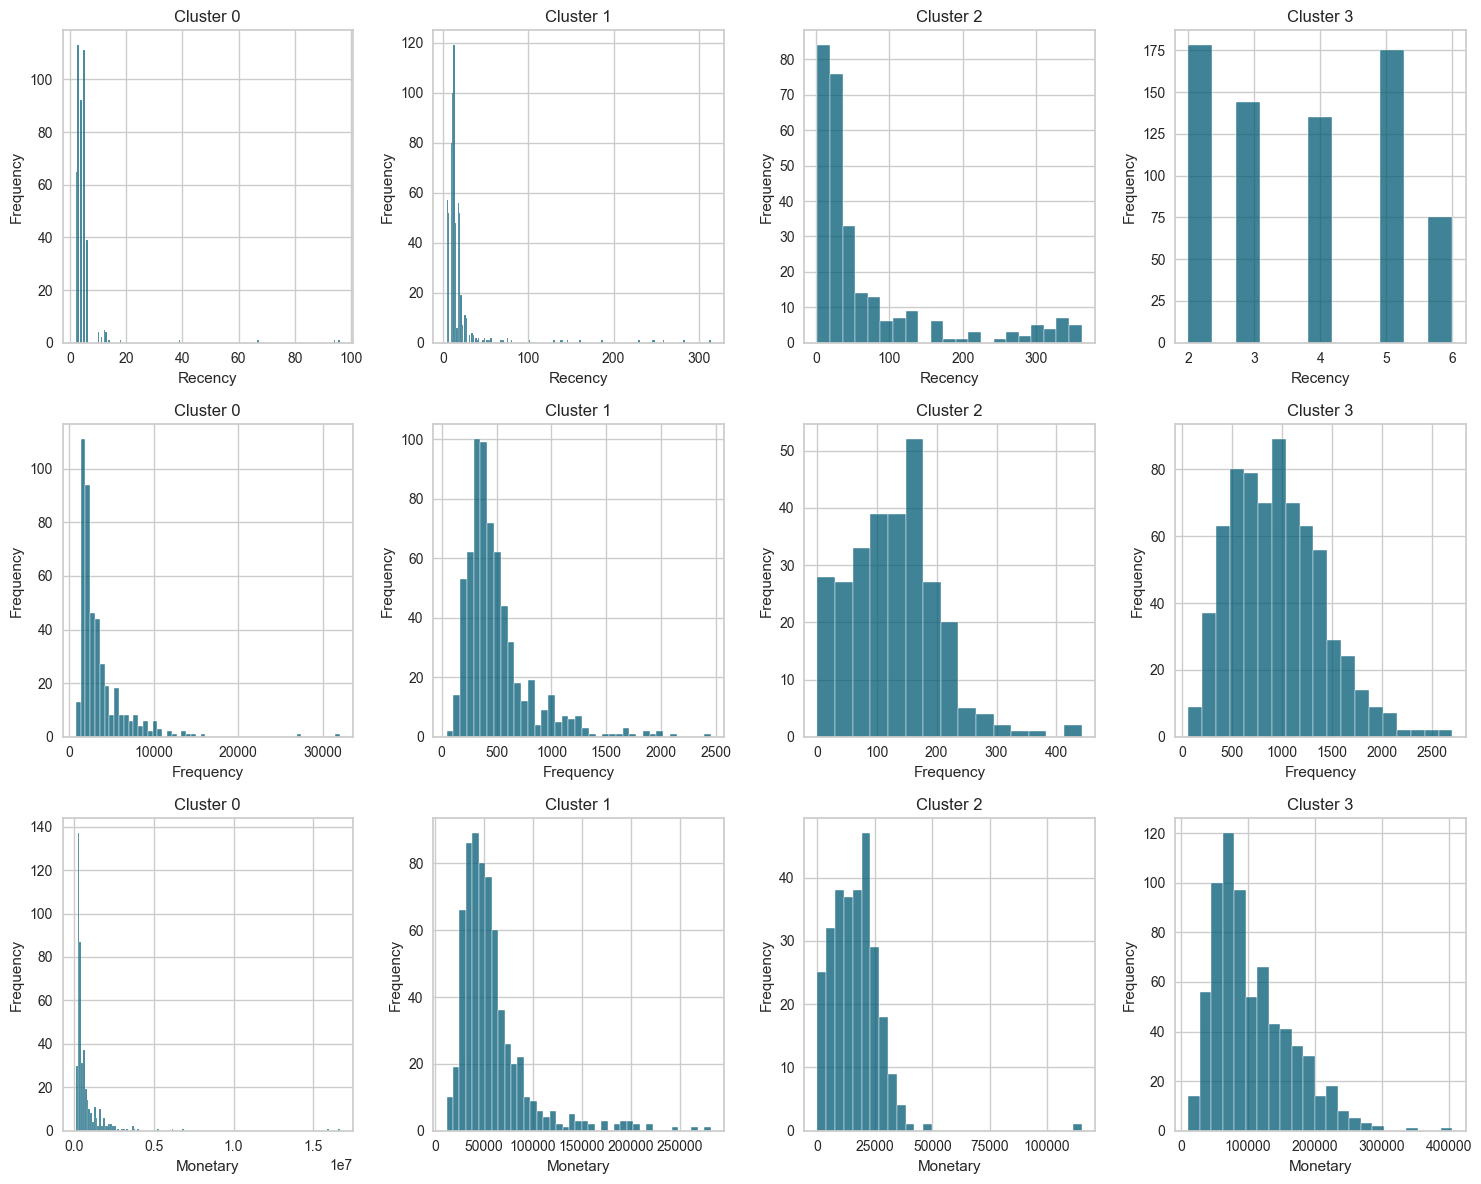

In [37]:
plot_cluster_histplots(rfm)

`Comment:`  
- By retaining the outliers from the beginning, it can be observed through some histogram plots that the data is concentrated in one range, with some points (with a relatively small proportion of data) extending far from the rest of the points (these are the outliers of each histogram that we are observing).  
- To make reading numbers and drawing conclusions through visual charts easier, we will use 90% of the data for observation.

In [38]:
# Create function to show histogram chart for each feature in RFM dataframe when using 90% data
def plot_cluster_histplots(dataframe):
    features = ['Recency', 'Frequency', 'Monetary']
    clusters = sorted(dataframe['Cluster'].unique())
    num_rows = len(features)
    num_cols = len(clusters)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

    for i, feature in enumerate(features):
        for j, cluster in enumerate(clusters):
            # Calculate 90 percentiles for the feature in the current cluster
            quantile_90 = dataframe[dataframe['Cluster'] == cluster][feature].quantile(0.9)
            sb.histplot(dataframe[(dataframe['Cluster'] == cluster) & 
                        (dataframe[feature] <= quantile_90)][feature], 
                         ax=axes[i, j], kde=False, color= "#005A74")
            axes[i, j].set_title(f'Cluster {cluster}')
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')


    plt.tight_layout()
    plt.show()

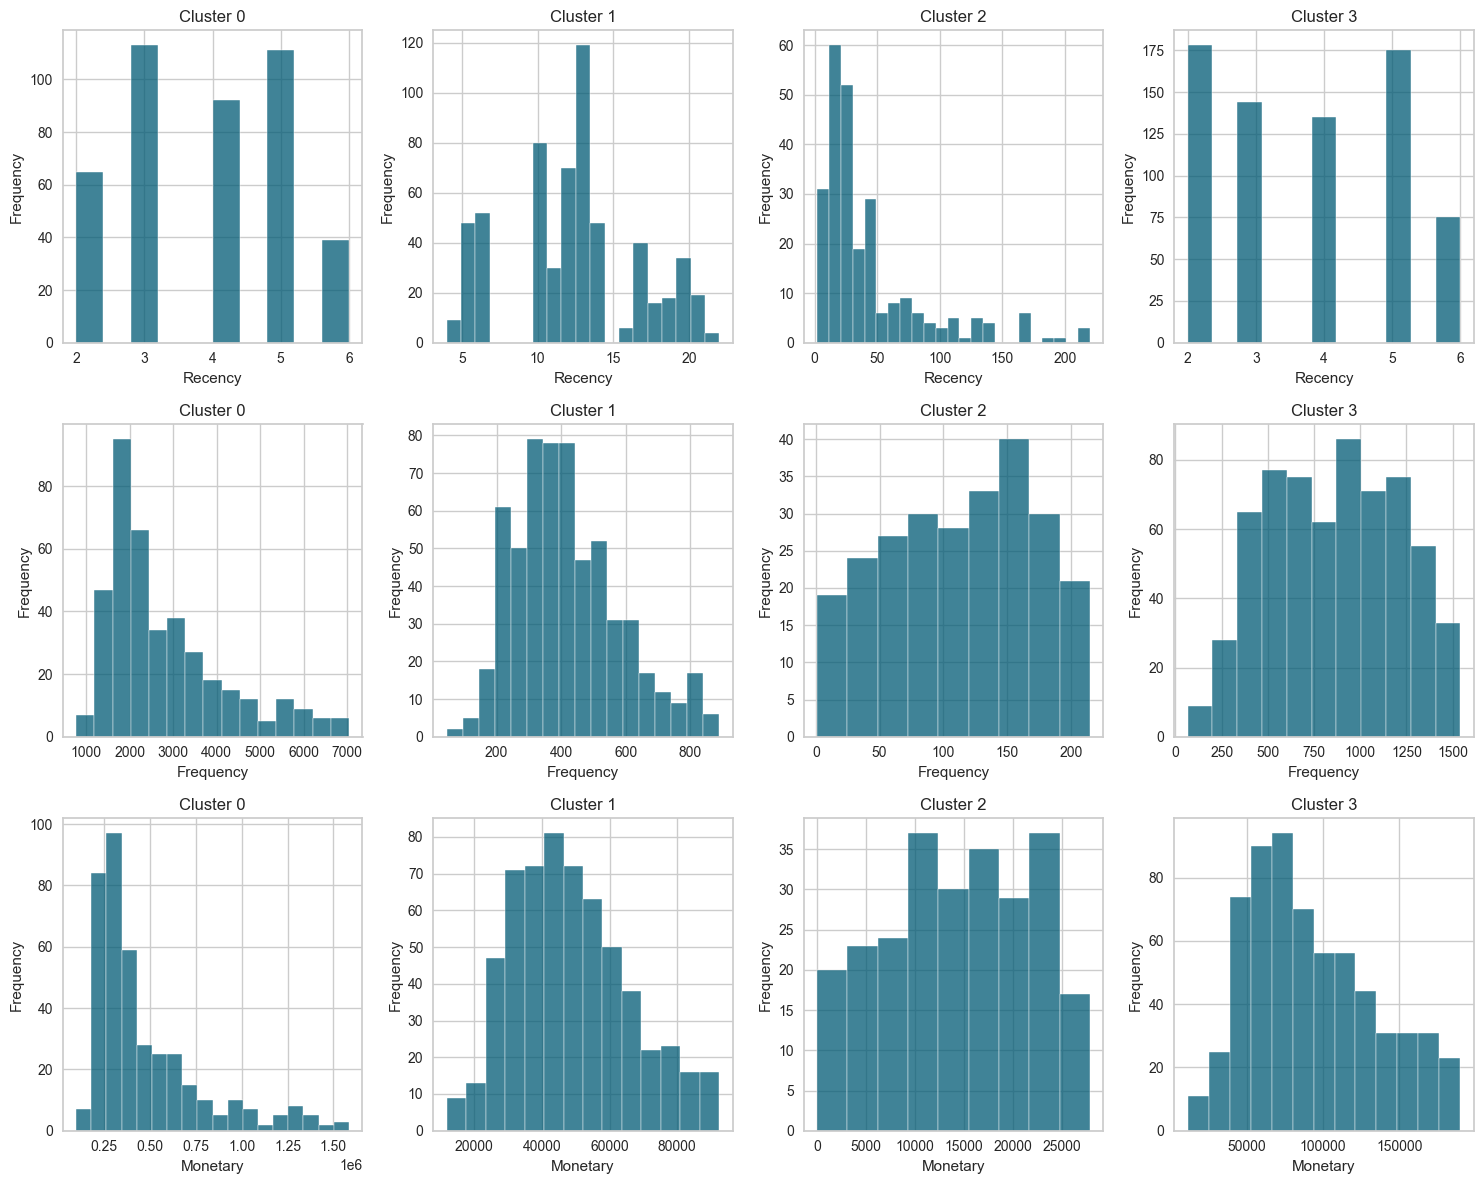

In [39]:
plot_cluster_histplots(rfm)

In [40]:
rfm_clusters

,Cluster,Recency,Frequency,Monetary
0,0,5.0,3573.0,740984.0
1,1,18.0,502.0,58150.0
2,2,69.0,128.0,16496.0
3,3,4.0,954.0,106200.0


In [41]:
for i in ['Recency', 'Frequency', 'Monetary']:
    print(i,'Average:',round(rfm[i].mean(),0))

Recency Average: 17.0
Frequency Average: 1254.0
Monetary Average: 213128.0


## **VI. Project Conclusion:**    
By using 90% of the data for observation, we now observe that the histogram plots better depict the distribution of the data. Combined with the Cluster Centers, we will label each customer segment and propose solutions for the following issues:  

### Cluster 0:  

`Summary:`
- Recency: The average time since the last purchase is 5 days. The time ranges from 2 to 6 days at a particular store. (Frequent)  
- Frequency: The average frequency of purchases is 3,573 orders per year. The number of orders ranges from 1,000 to 7,000 (with a maximum of 2,000) orders at a particular store. (Very High)  
- Monetary: The average expenditure is 739,590 (Dollars). The expenditure ranges from 250,000 to 1,500,000 (Dollars). (Very High)


`Champions:`  
- These are new customers who transact frequently and spend the most. They are highly loyal, generous spenders, and likely to make another purchase soon.  


`Problem:`  
- How can we retain these customers by any means necessary?

`Recomment:`
- Offer them privileges such as special discounts or early access to new products.  
- Attract them with exclusive promotional discount programs.  
- Encourage them to participate in loyalty programs to receive more benefits from their shopping.  

### Cluster 1:  

`Summary:`  
- Recency: The average time since the last purchase is 18 days. The time ranges from 5 to 20 days (with a maximum of 13 days) at a particular store. (Average)  
- Frequency: The average frequency of purchases is 502 orders per year. The number of orders ranges from 200 to 800 orders at a particular store. (Low)  
- Monetary: The average expenditure is 57,858 (Dollars). The expenditure ranges from 20,000 to 80,000 (Dollars). (Relatively high compared to the total number of orders)  


`Big Spenders:` 
- This group of customers does not make purchases frequently, but they have a high value per order compared to the modest frequency of purchases.  


`Problem:`  
- How can they be encouraged to make more frequent purchases?

`Recomment:` 
- Offer limited-time special promotions.  
- Provide recommendations based on their previous purchases.  
- Encourage them to join a membership program to receive more benefits, such as reward points, special discounts, thereby increasing their purchase frequency and fostering brand loyalty.  

### Cluster 2:  

`Summary:`  
- Recency: The average time since the last purchase is 69 days. The time ranges from 10 to over 200 days at a particular store. (Quite long)  
- Frequency: The average frequency of purchases is 128 orders per year. The number of orders ranges from 50 to 200 orders at a particular store. (Very Low)  
- Monetary: The average expenditure is 16,428 (Dollars). The expenditure ranges from 5,000 to 25,000 (Dollars). (Very Low)  


`Need Attention:`  
- This group of customers purchases infrequently, with relatively low quantity and value of orders.    


`Problem:`  
- What causes their dissatisfaction and infrequent purchases?     


`Recomment:`
- Reconnect with these customers through various means such as emails, direct interactions via social media, or phone calls.  
- Implement retargeting campaigns, short-term promotional programs with forms of vouchers, discounts, exclusive offers, etc.  
- Offer free trial policies to encourage them to return and make purchases.
- Additionally, analyze their shopping cart history to identify any product-related factors contributing to their dissatisfaction.   

### Cluster 3: 

`Summary:`  
- Recency: The average time since the last purchase is 4 days. The time ranges from 2 to 6 days at a particular store. (Regularly)  
- Frequency: The average frequency of purchases is 953 orders per year. The number of orders ranges from 250 to 1,500 orders at a particular store. (On average)    
- Monetary: The average expenditure is 105,752 (Dollars). The expenditure ranges from 50,000 to 150,000 (Dollars). (On average)    


`Potential Loyalist:`  
- As a potential loyal customer group, these are individuals who have made recent purchases, but their quantity and value of orders are only at average levels.     


`Problem:`  
- How can we increase the value of their shopping cart with each purchase?

`Recomment:`
- Offer free gifts for transactions above the brand's average value.
- Upsell high-value products.
- Seek feedback and implement campaigns to enhance engagement.




## **VII. Transform Cluster to Segment data and Export file**

#### 1. Transform & Merge data

In [42]:
rfm_clusters.reset_index(inplace = True, drop = True)
rfm_clusters

,Cluster,Recency,Frequency,Monetary
0,0,5.0,3573.0,740984.0
1,1,18.0,502.0,58150.0
2,2,69.0,128.0,16496.0
3,3,4.0,954.0,106200.0


In [43]:
# Transform from Cluster to Segment name
rfm['Cluster'] = rfm['Cluster'].replace(0, 'Champions')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(0, 'Champions')

rfm['Cluster'] = rfm['Cluster'].replace(1, 'Big Spenders')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(1, 'Big Spenders')

rfm['Cluster'] = rfm['Cluster'].replace(2, 'Need Attention')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(2, 'Need Attention')

rfm['Cluster'] = rfm['Cluster'].replace(3, 'Potential Loyalist')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(3, 'Potential Loyalist')

# Rename Cluster column to Segment column
rfm = rfm.rename(columns = {'Cluster' : 'Customer Segment'})
rfm_clusters = rfm_clusters.rename(columns = {'Cluster' : 'Customer Segment'})

# Check rfm dataframe when transform
rfm

,Store Number,Recency,Frequency,Monetary,Customer Segment
0,2106,3,3261,861093.54,Champions
1,2130,3,3211,1617666.03,Champions
2,2190,3,32002,15980052.64,Champions
3,2191,4,6779,1505725.59,Champions
4,2200,6,3516,321115.87,Champions
...,...,...,...,...,...
2082,10313,10,27,9711.08,Need Attention
2083,10314,19,110,12674.25,Need Attention
2084,10315,6,53,9825.10,Need Attention
2085,10316,2,26,3085.87,Need Attention


In [44]:
rfm['Customer Segment'].value_counts()

Potential Loyalist    707
Big Spenders          659
Champions             441
Need Attention        280
Name: Customer Segment, dtype: int64

In [45]:
rfm_clusters

,Customer Segment,Recency,Frequency,Monetary
0,Champions,5.0,3573.0,740984.0
1,Big Spenders,18.0,502.0,58150.0
2,Need Attention,69.0,128.0,16496.0
3,Potential Loyalist,4.0,954.0,106200.0


In [46]:
# Merge Segment column from rfm dataframe in data df
data = data.merge(rfm[['Store Number', 'Customer Segment']], on = 'Store Number')

# Test sample data in dataframe 
data.sample(5)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude,Customer Segment
1764172,INV-63721100066,2023-10-27,2618,HY-VEE DRUGSTORE #6 / CEDAR RAPIDS,505 BOYSON RD NE,CEDAR RAPIDS,52402,LINN,1081000,AMERICAN CORDIALS & LIQUEURS,421,SAZERAC COMPANY INC,80000,BUFFALO TRACE BOURBON CREAM MINI 50.0 (ml),1,50.0,60.00,90.00,1,90.00,0.05,0.01,-91.63912,42.04672,Champions
1107023,INV-59344100039,2023-06-13,3385,SAM'S CLUB 8162 / CEDAR RAPIDS,2605 BLAIRS FERRY RD NE,CEDAR RAPIDS,52402,LINN,1081400,AMERICAN SCHNAPPS,65,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS 1000.0 (ml),12,1000.0,7.87,11.81,12,141.72,12.00,3.17,-91.67969,42.031819,Champions
224055,INV-65386400001,2023-12-18,6242,WALL TO WALL WINE AND SPIRITS / WEST DES MOINES,375 SOUTH JORDAN CREEK PARKWAY,WEST DES MOINES,50266,DALLAS,1701100,TEMPORARY & SPECIALTY PACKAGES,370,PERNOD RICARD USA,100948,CODIGO 1530 COMBO MINI 50.0 (ml),20,50.0,8.97,13.46,20,269.20,1.00,0.26,-93.80947,41.56373,Champions
2166144,INV-63284400016,2023-10-15,5463,BACKWATER SPIRITS AND MORE,116 W WATER ST STE D,DECORAH,52101,WINNESHIEK,1701100,TEMPORARY & SPECIALTY PACKAGES,420,MOET HENNESSY USA,4457,GLENMORANGIE 15YR CADBOLL ESTATE 2023 EDITION 750.0 (ml),6,750.0,49.99,74.99,1,74.99,0.75,0.19,-91.78668,43.30421,Potential Loyalist
788249,INV-57847600006,2023-04-25,4192,FAREWAY STORES #044 / BETTENDORF,3800 BELMONT RD,BETTENDORF,52722,SCOTT,1701100,TEMPORARY & SPECIALTY PACKAGES,755,WINESOURCE INTERNATIONAL INC.,25086,MURRAY HILL CLUB A BOURBON BLEND 750.0 (ml),6,750.0,60.14,90.21,1,90.21,0.75,0.19,-90.48035,41.55631,Champions


In [47]:
# Check nunique data Segment using group by Store Number
number_customers = data.groupby('Customer Segment')['Store Number'].nunique().reset_index()
number_customers

,Customer Segment,Store Number
0,Big Spenders,659
1,Champions,441
2,Need Attention,280
3,Potential Loyalist,707


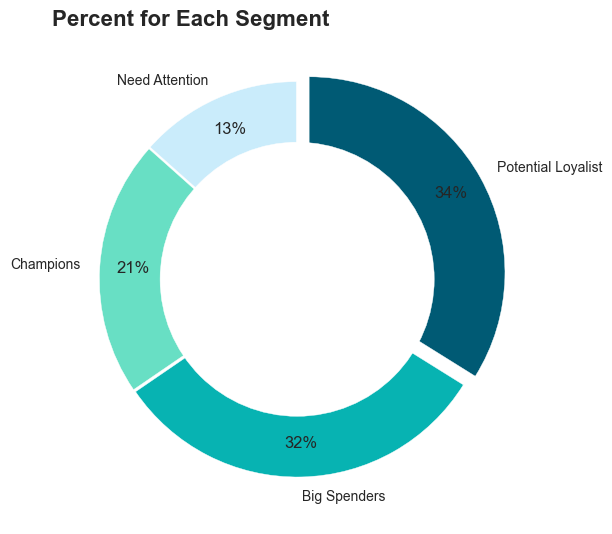

In [48]:
# Sort values by Number feature
number_customers.sort_values(by = 'Store Number', ascending= True, inplace= True)
# Reset index df
number_customers.reset_index(drop = True, inplace = True)

# Create pie chart to show percent for each cluster
labels = [(str(number_customers['Customer Segment'][x])) for x in range(len(number_customers))]
explode = [0.01, 0.01, 0.01, 0.07]
plt.pie(number_customers['Store Number'],
        labels = labels,
        autopct = '%1.0f%%',
        startangle = 90,
        explode= explode,
        pctdistance=0.83,
        colors = RFM_color
       )
# plt.axis('equal')
plt.title('Percent for Each Segment', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()

circle = plt.Circle(xy= (0,0), radius= .70, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show();

Customer Ratio Analysis by Group:  

1. Potential Group:  

- Percentage: 66% of customers belong to the Potential Loyalist and Big Spenders groups. This is a high percentage and a good sign for the capital.  
- Opportunity: This group has the potential to become Champions in the future.  
- Strategy: Focus on nurturing loyalty and increasing spending within this group.  


2. Current Champions Group:  

- Percentage: 21% of customers belong to the Champions group.  
- Status: This group is relatively stable.  
- Strategy: Maintain satisfaction and continue to attract support from this group.


3. Need Attention Group:  

- Percentage: 13% of customers belong to the Need Attention group.  
- Priority: This is the group that needs to be addressed first.  
- Action: Carefully analyze the reasons why they fall into this group and develop timely solutions to retain them and prevent them from moving to the Lost group.


Conclusion:  

- The analysis of customer ratios by group shows that the capital has great potential to develop the Champions group in the future.  
- The Need Attention group needs to be prioritized and addressed promptly to avoid losing customers.  

#### 2. Export data

`Data final`

In [49]:
data.to_csv('data_cleaned/Iowa_Liquor_Sales_final.csv', index = False)

In [50]:
rfm_clusters.to_csv('data_model_pbi/Iowa_Liquor_RFMcluster.csv', index = False)
rfm_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer Segment  4 non-null      object 
 1   Recency           4 non-null      float64
 2   Frequency         4 non-null      float64
 3   Monetary          4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes


In [51]:
rfm_clusters

,Customer Segment,Recency,Frequency,Monetary
0,Champions,5.0,3573.0,740984.0
1,Big Spenders,18.0,502.0,58150.0
2,Need Attention,69.0,128.0,16496.0
3,Potential Loyalist,4.0,954.0,106200.0


In [52]:
rfm.to_csv('data_cleaned/Iowa_Liquor_RFMdata.csv', index = False)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2086
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store Number      2087 non-null   int64  
 1   Recency           2087 non-null   int64  
 2   Frequency         2087 non-null   int64  
 3   Monetary          2087 non-null   float64
 4   Customer Segment  2087 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 97.8+ KB
